# Diagnosing the data issues:

In [1]:
import pandas as pd 
import numpy as np 
% matplotlib inline
from matplotlib import pyplot as plt

# The data you'll be exloring:

In [2]:
data = pd.read_csv('all_data.csv')

In [3]:
data.head(10)

Unnamed: 0   age  height  gender
0  CFLOXRHMDR  88.0   163.0  female
1  FXLJSNLSOG  29.0   158.0  female
2  FWDIVJKGOI  42.0   159.0  female
3  YWEBKQWHRE  25.0   179.0    male
4  YPUQAPSOYJ  32.0   169.0    male
5  YPUQAPSOYJ  32.0   169.0    male
6  YPUQAPSOYJ  32.0   169.0    male
7  YPUQAPSOYJ  32.0   169.0    male
8  SSZQEGTLNK   NaN   162.0    male
9  PRFEFXNGWN  36.0   166.0  female

## Duplicated data: 

We seem to have a problem with some duplicated data. We can find them using Pandas [duplicated](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.drop_duplicates.html)

In [4]:
duplicated_data = data.duplicated()

In [5]:
duplicated_data.head()

0    False
1    False
2    False
3    False
4    False
dtype: bool

So this is actually a mask. We can now ask for the data where the mask applies: 

In [6]:
data[duplicated_data]

Unnamed: 0   age  height gender
5  YPUQAPSOYJ  32.0   169.0   male
6  YPUQAPSOYJ  32.0   169.0   male
7  YPUQAPSOYJ  32.0   169.0   male

## Missing data: 

In [7]:
heights = data['height']
ages = data['age']
gender = data['gender']

##### How much missing data do we have for heights? 

Make a mask, with those who are missing, using [isnull](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.isnull.html)

In [8]:
missing_height = heights.isnull()

In [9]:
missing_height.head()

0    False
1    False
2    False
3    False
4    False
Name: height, dtype: bool

In python, False evaluates to 0, and True to 1. So we can count the number of missing by doing:

In [10]:
missing_height.sum()

4

As before, we can use that mask on our original dataset, and see it: 

In [11]:
data[missing_height]

Unnamed: 0   age  height gender
15   CWCFROPRFE  22.0     NaN   male
80   EORSIPDIHA  21.0     NaN   MALE
121  NGJOHICWSY  41.0     NaN   male
144  LNLAPFIJEQ  37.0     NaN   male

##### How about age? 

In [12]:
missing_ages = ages.isnull()

In [13]:
data[missing_ages]

Unnamed: 0  age  height  gender
8    SSZQEGTLNK  NaN   162.0    male
23   TJQPFEFVVH  NaN   182.0     NaN
32   PYHWLDVICX  NaN   181.0  female
47   MLRPKGKACD  NaN   185.0    male
79   SGMGUJEBNC  NaN   173.0    MALE
82   YZDOYNOXAF  NaN   144.0  female
124  UAOAMGUQSX  NaN   144.0    male
160  JFVZOEGUUA  NaN   208.0  female
198  VYAQBLJKXJ  NaN   165.0    male

##### And gender? 

Here we're going to do something clever. We're going to get the [value_counts](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.value_counts.html), but we're going to change the parameter dropna (drop nulls) to false, so that we keep them. 

This would not be very useful with numerical data, but given that we know that age is categorical, we might as well: 

In [14]:
gender.value_counts(dropna=False)

female    113
male       69
MALE        9
NaN         9
Name: gender, dtype: int64

In [15]:
missing_gender = data['gender'].isnull()
data[missing_gender]

Unnamed: 0    age  height gender
23   TJQPFEFVVH    NaN   182.0    NaN
83   QXUGUHCOPT  101.0   196.0    NaN
88   LKEHZFGGTS   49.0   177.0    NaN
95   EBTRPEDHJS   43.0   147.0    NaN
101  BDFQWIHWCH   27.0   167.0    NaN
102  NUCCGRJLXN   20.0   159.0    NaN
113  GQSNBZIGBL   27.0   197.0    NaN
174  KWJJMPVSCP   24.0   189.0    NaN
183  LMZUTCGFYT   21.0   153.0    NaN

But wait, we have another problem. We seem to have `male` and `MALE`:

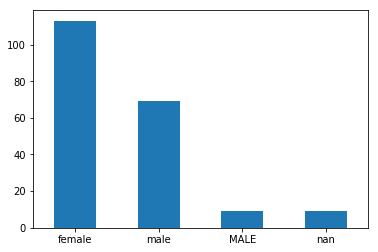

In [16]:
gender.value_counts(dropna=False).plot(kind='bar', rot=0)

## Outliers: 

#### What is the distribution of the heights? 

Note: [pyplot](https://matplotlib.org/api/pyplot_api.html) is used here to make axis labels. Because otherwise, [this happens](https://xkcd.com/833/)

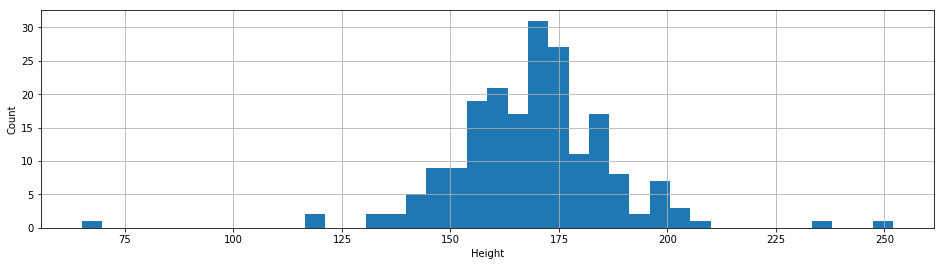

In [17]:
heights.hist(bins=40, figsize=(16,4))
plt.xlabel('Height') 
plt.ylabel('Count')

This was useful, we can see that there are some really tall people, and some quite small ones. The distribution also looks close to [normal](Normal distribution - Wikipedia)

### Who is outside of 2 standard deviations? 

Let's make a quick function to deal with this... 

In [18]:
def print_analysis(series):
    for nr in range(1, 4):
        
        upper_limit = series.mean() + (nr * series.std())
        lower_limit = series.mean() - (nr * series.std())
                
        over_range = series > upper_limit
        percent_over_range = over_range.sum() / len(series) * 100
        
        under_range = series < lower_limit 
        percent_under_range = under_range.sum() / len(series) * 100
        
        in_range = (series < upper_limit) & (series > lower_limit)
        percent_in_range = in_range.sum() / len(series) * 100


        print('\nFor the range of %0.0f standard deviations:' % nr)
        print('  Lower limit:               %0.0f' % lower_limit)
        print('  Percent under range:       %0.1f%%' % percent_under_range)
        print('  Upper limit:               %0.0f' % upper_limit)
        print('  Percent over range:        %0.1f%%' % percent_over_range)
        print('  Percent within range:      %0.1f%%' % percent_in_range)

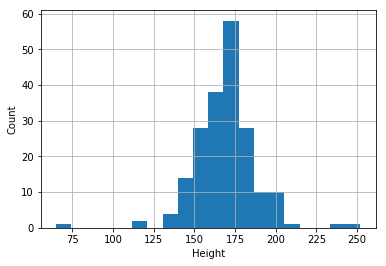

In [19]:
heights.hist(bins=20)
plt.xlabel('Height')
plt.ylabel('Count')

In [20]:
print_analysis(heights)


For the range of 1 standard deviations:
  Lower limit:               150
  Percent under range:       11.0%
  Upper limit:               187
  Percent over range:        11.5%
  Percent within range:      75.5%

For the range of 2 standard deviations:
  Lower limit:               131
  Percent under range:       2.0%
  Upper limit:               206
  Percent over range:        1.5%
  Percent within range:      94.5%

For the range of 3 standard deviations:
  Lower limit:               113
  Percent under range:       0.5%
  Upper limit:               225
  Percent over range:        1.0%
  Percent within range:      96.5%


# Looking at a few of these outliers: 

In [21]:
heights[heights < heights.mean() - 2*heights.std()]

21      65.0
97     119.0
161    119.0
168    131.0
Name: height, dtype: float64

Over: 

In [22]:
heights[heights > heights.mean() + 2*heights.std()]

20     252.0
22     235.0
160    208.0
Name: height, dtype: float64

Note: the 131cm and 208cm actually seem quite plausible. 

### And outside 3 standard deviations?

Under: 

In [23]:
heights[heights < heights.mean() - 3*heights.std()]

21    65.0
Name: height, dtype: float64

In [24]:
heights[heights > heights.mean() + 3*heights.std()]

20    252.0
22    235.0
Name: height, dtype: float64

### How about the ages? 

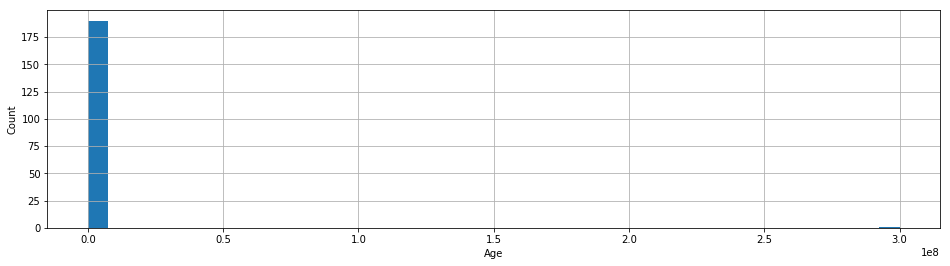

In [25]:
ages.hist(bins=40, figsize=(16,4))
plt.xlabel('Age')
plt.ylabel('Count')

In [26]:
print_analysis(ages)


For the range of 1 standard deviations:
  Lower limit:               -20136523
  Percent under range:       0.0%
  Upper limit:               23277948
  Percent over range:        0.5%
  Percent within range:      95.0%

For the range of 2 standard deviations:
  Lower limit:               -41843759
  Percent under range:       0.0%
  Upper limit:               44985184
  Percent over range:        0.5%
  Percent within range:      95.0%

For the range of 3 standard deviations:
  Lower limit:               -63550995
  Percent under range:       0.0%
  Upper limit:               66692420
  Percent over range:        0.5%
  Percent within range:      95.0%


Well, this is quite useless. The reason is that using standard deviations assumes that the distribution is normal, and we can clearly see it isn't. 

### Let's try to solve this with other means... 

What's the biggest outlier we have? 

In [27]:
ages.max()

300000000.0

What if we used percentiles?

In [28]:
extreme_value = .99
ages.dropna().quantile(extreme_value)

120.49999999999935

Note: we had to use `.dropna()` there, as otherwise pandas would raise a `runtime error`(try it!) 

#### Now, let's take a look at what our data is under this extreme value: 

In [29]:
# under_extreme_value = ages, where ages is smaller than the extreme value: 
under_extreme_value = ages[ages < ages.dropna().quantile(extreme_value)]

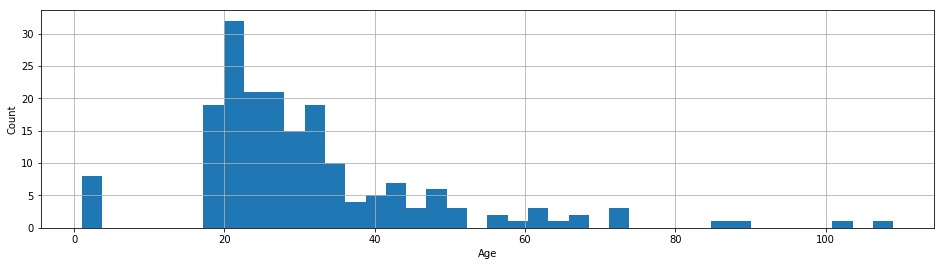

In [30]:
under_extreme_value.hist(bins=40, figsize=(16,4))
plt.xlabel('Age')
plt.ylabel('Count')

Now that looks a lot better. We can clearly identify that almost everyone is an adult, except the point on the extreme left. 

In [31]:
non_babies = under_extreme_value[under_extreme_value > 10]

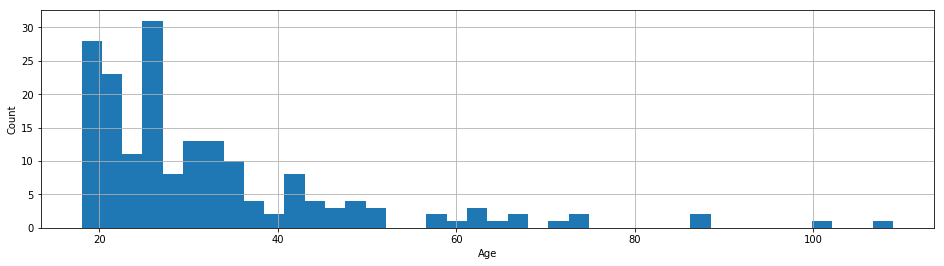

In [32]:
non_babies.hist(bins=40, figsize=(16,4))
plt.xlabel('Age')
plt.ylabel('Count')

Starting to look better, what about the point on the far right? 

In [33]:
non_babies.max()

109.0

Seems [legit](https://en.wikipedia.org/wiki/List_of_the_verified_oldest_people). 